In [8]:
%load_ext autoreload
%autoreload 2

In [1]:
from exm.stitching.tileset import Tileset
from exm.utils import display_img as di 
import numpy as np

project_path = "/home/yves/Private/Fixstars/datasets/ZebrafishBrain/20221017_alignment/"

ts=Tileset([0.1625*2, 0.1625*2, 0.4])

### Reconstruct a stitched segmented dataset

In [2]:
# Initialize from a non BDV file format. The H5 file only contain tiles, we need to initialize the offsets from 
# another source

segfile = f"{project_path}/segmentation/20221017_alignment_slice1_masks.h5"
ts.init_from_h5(segfile, downscale=[5,5,2], progress=True)

Tile #0
Tile #1
Tile #2
Tile #3
Tile #4
Tile #5
Tile #6
Tile #7
Tile #8
Tile #9
Tile #10
Tile #11


In [3]:
# To initialize offsets we use the XML file obtained from the stitching step

stitchfile = f"{project_path}/stitching/slice1.xml"
ts.update_offsets(stitchfile)

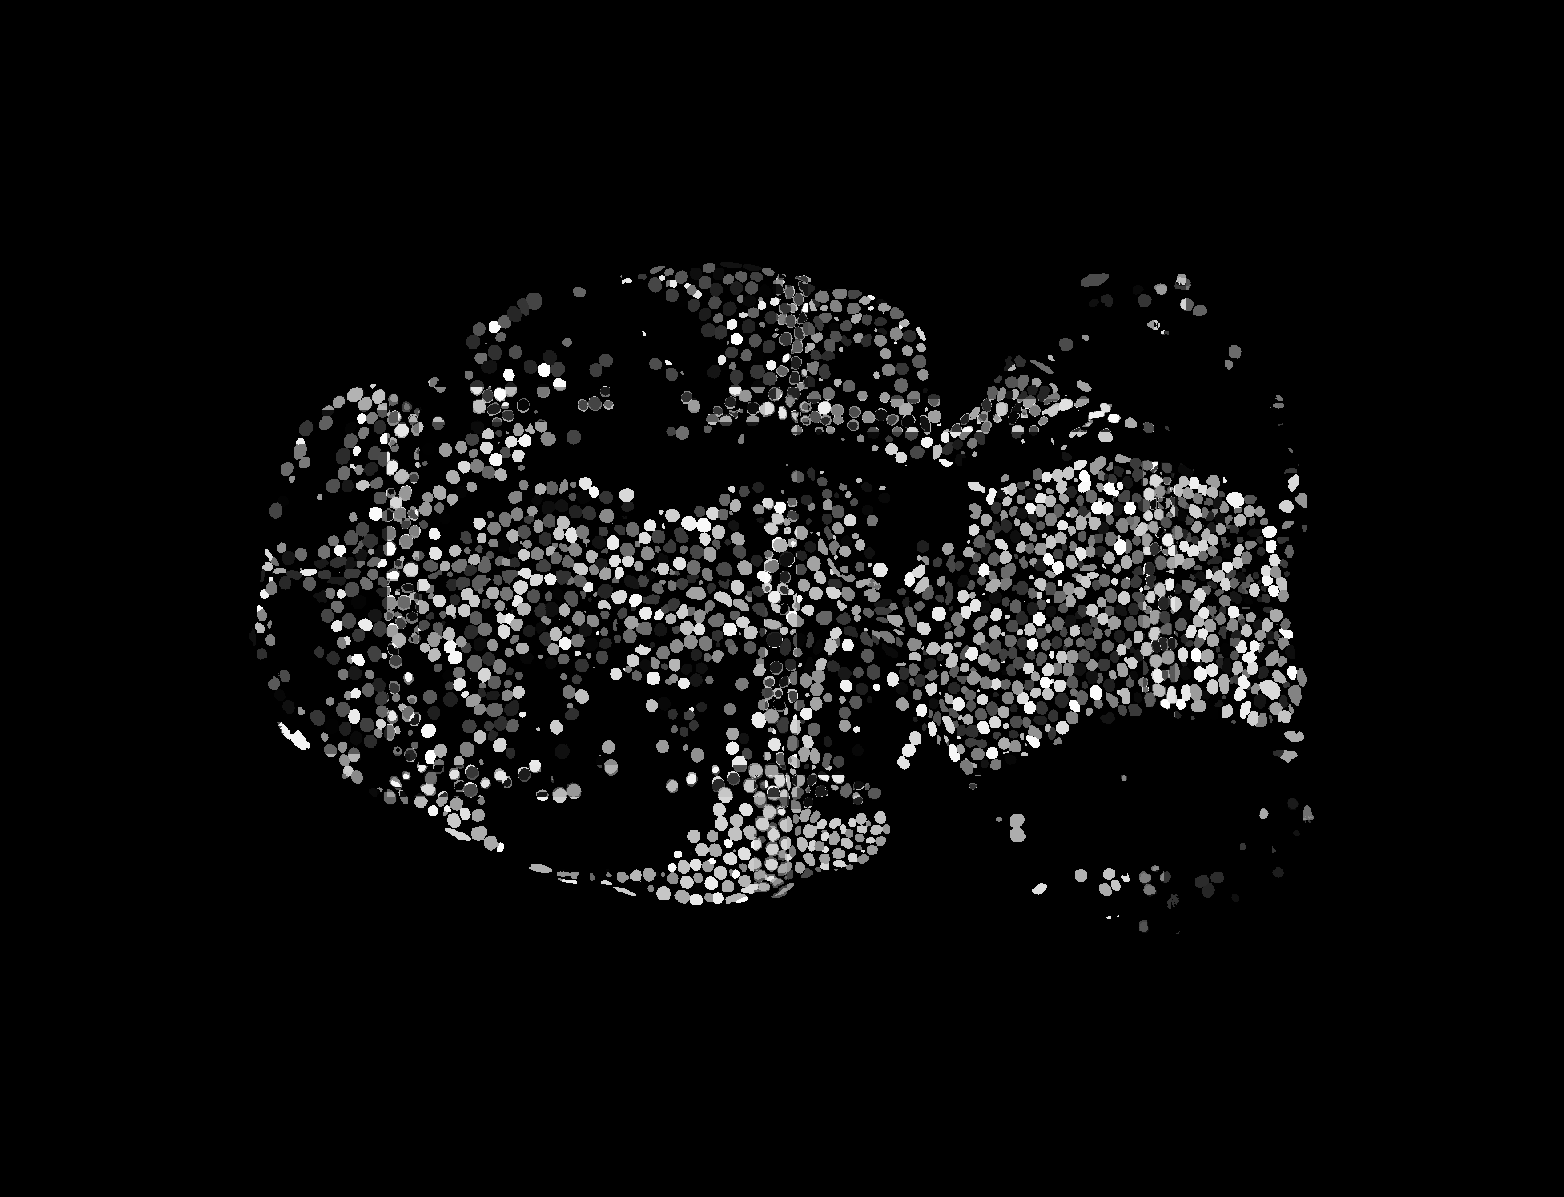

In [4]:
# Check if this looks good. 

di((ts.show_slice(51).T%256).astype(np.uint8))

# Notice that some nuclei have multiple colors, we will fix that with the deduplication

### Deduplicate nuclei IDs

In [5]:
_ = ts.dedup_segmentation_ids(progress=True)

0rocessing overlap 28/29     
1
2
3
4
5
6
7
8
9
10
11


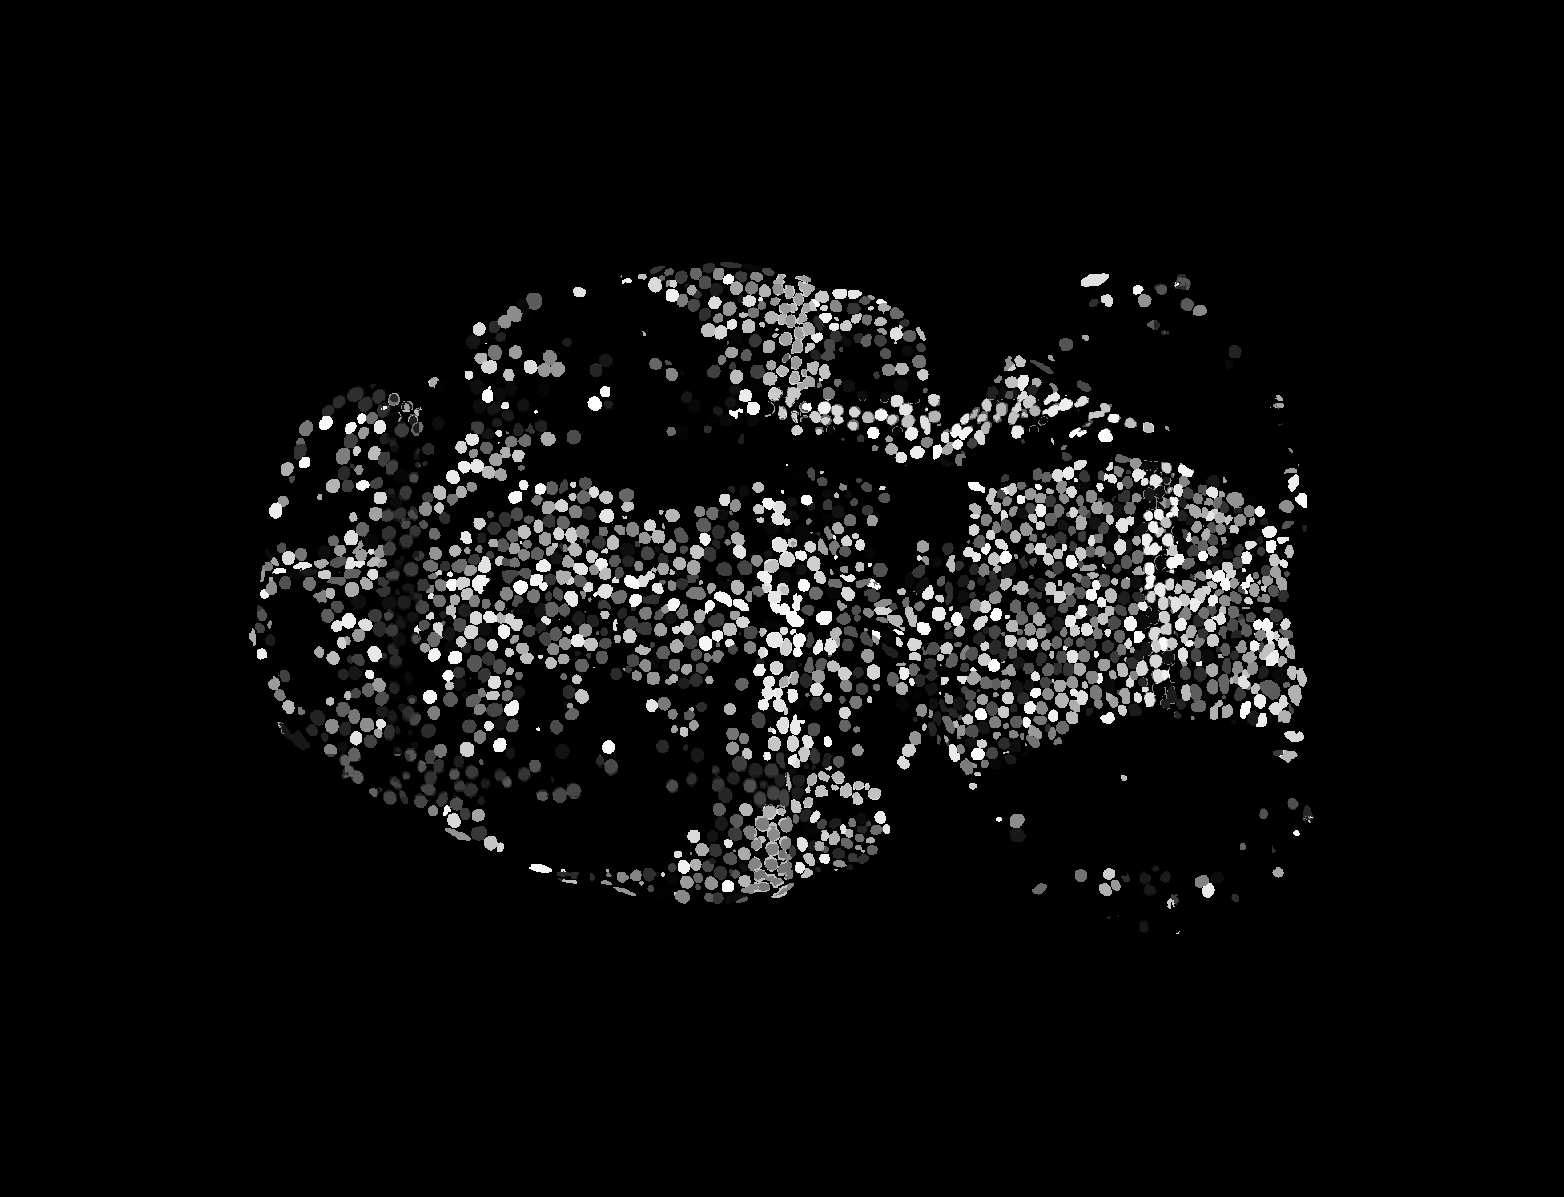

In [6]:
di((ts.show_slice(51).T%256).astype(np.uint8))

### Find centroids

In [ ]:
centers = ts.get_centroids()

Produce output volume
produce bincount
calculate centroids


In [ ]:
centers.shape

In [ ]:
centers

In [ ]:
np.max(centers[1:],axis=0)